<a href="https://colab.research.google.com/github/gongback39/2024_2_Data_analysis/blob/main/1%EB%B6%84%EB%B0%98/%20%EC%9D%B4%EC%A7%80%EB%AF%BC/2%EC%A3%BC%EC%B0%A8-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 정제(data cleaning)
데이터에서 손상되거나 부정확한 부분을 수정하고, 불필요한 데이터를 삭제하거나 불완전한 값을 교체하는 등의 작업
> **데이터 랭글링, 데이터 먼징** : 데이터를 분석 목적에 맞게 변환


## 열 삭제
> **loc 메서드** -> 슬라이싱


In [67]:
import gdown

gdown.download('https://bit.ly/3RhoNho', 'ns_202104.csv', quiet=False)

Downloading...
From: https://bit.ly/3RhoNho
To: /content/ns_202104.csv
100%|██████████| 57.6M/57.6M [00:00<00:00, 167MB/s]


'ns_202104.csv'

In [68]:
import pandas as pd
ns_df = pd.read_csv('ns_202104.csv', low_memory=False)
ns_df.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN


In [69]:
ns_book = ns_df.loc[:, '번호':'등록일자']
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


### **loc 메서드와 불리얼 배열**<br />

**원소별 비교**
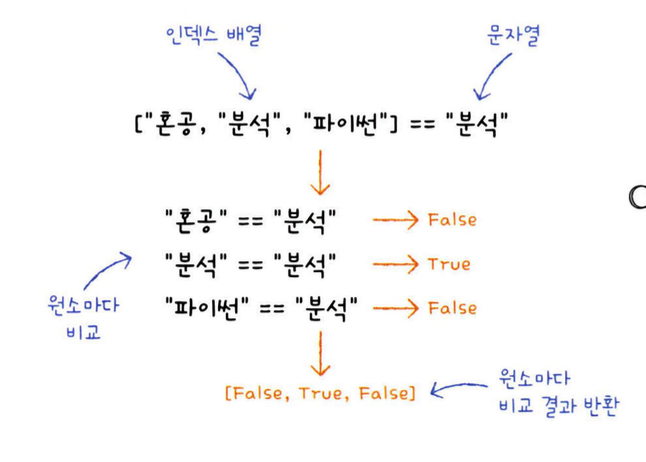

In [70]:
print(ns_df.columns)

Index(['번호', '도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권',
       '주제분류번호', '도서권수', '대출건수', '등록일자', 'Unnamed: 13'],
      dtype='object')


> columns 속성 : index 클래스 객체

In [71]:
print(ns_df.columns[0])

번호


In [72]:
ns_df.columns != 'Unnamed: 13'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [73]:
selected_columns = ns_df.columns != 'Unnamed: 13'
ns_book = ns_df.loc[:, selected_columns]
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [74]:
selected_columns = ns_df.columns != '부가기호'
ns_book = ns_df.loc[:,selected_columns]
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,1,0,2021-03-19,NaN


### drop() 메서드
데이터 프레임의 행이나 열을 삭제하는 메서드 **axis 매개변수**를 활용

In [75]:
ns_book = ns_df.drop("Unnamed: 13", axis = 1)
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [76]:
ns_book = ns_df.drop(['부가기호', "Unnamed: 13"], axis = 1)
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,1,0,2021-03-19


> **inplace 매개변수**
<br /> 해당 데이터 프레임 수정<br />
변경된 값을 반환하는 것이 아님

In [77]:
ns_book.drop('주제분류번호', axis = 1, inplace=True)
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,권,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,1,0,2021-03-19


### dropna()메서드

NaN이 하나 이상 포함된 행이나 열을 삭제



In [78]:
ns_book = ns_df.dropna(axis=1)
ns_book.head()

,번호,ISBN,도서권수,대출건수,등록일자
0,1,9788937444319,1,0,2021-03-19
1,2,9791190123969,1,0,2021-03-19
2,3,9788968332982,1,0,2021-03-19
3,4,9788970759906,1,0,2021-03-19
4,5,9788934990833,1,0,2021-03-19


> 모든 값이 NaN인 열을 삭제 : **how 매개변수**

In [79]:
ns_book = ns_df.dropna(axis=1, how='all')
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


# 행삭제
**drop()메서드** 사용시 **axis 매개변수**를 0으로 하거나 기본값이 0이기 때문에 생략

In [80]:
ns_book2 = ns_book.drop([0,1])
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
5,6,처음 읽는 음식의 세계사,"미야자키 마사카츠 지음, 한세희 옮김",탐나는책,2021,9791189550370,NaN,NaN,NaN,NaN,1,0,2021-03-19
6,7,아르센 벵거 자서전 My Life in Red and White,"아르센 벵거 지음, 이성모 옮김",한즈미디어(한스미디어),2021,9791160075793,NaN,NaN,NaN,NaN,1,0,2021-03-19


### [] 연산자와 슬라이싱의 활용

In [81]:
ns_book2 = ns_book[2:]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
5,6,처음 읽는 음식의 세계사,"미야자키 마사카츠 지음, 한세희 옮김",탐나는책,2021,9791189550370,NaN,NaN,NaN,NaN,1,0,2021-03-19
6,7,아르센 벵거 자서전 My Life in Red and White,"아르센 벵거 지음, 이성모 옮김",한즈미디어(한스미디어),2021,9791160075793,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [82]:
ns_book2 = ns_book[0:2]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


### []연산자와 불리언 배열

In [83]:
selected_rows = ns_df['출판사'] == '한빛미디어'
ns_book2 = ns_book[selected_rows]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
60,61,(맛있는 디자인)프리미어 프로 CC: 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원,심수진,윤성우,김덕영 지음",한빛미디어,2021,9791162244029,NaN,1,2021,005.567,1,1,2021-03-15
70,71,처음 배우는 애저 (Azure Portal로 배우는 애저 도입부터 활용까지),김도균,한빛미디어,2020,9791162243695,NaN,NaN,NaN,005.74,1,1,2021-03-15
88,89,맛있는 디자인 프리미어 프로 CC 2021 - 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원, 심수진, 윤성우, 김덕영 (지은이)",한빛미디어,2021,9791162244029,NaN,NaN,NaN,NaN,0,0,2021-03-15
156,157,"실전 보고서 작성 기술 with 파워포인트, 워드, 한글",홍장표 지음,한빛미디어,2020,9791162243763,NaN,NaN,NaN,NaN,1,0,2021-03-12
198,199,처음 배우는 리액트 네이티브,김범준 지음,한빛미디어,2021,9791162243879,NaN,NaN,NaN,NaN,1,0,2021-03-12


> loc 활용?

In [84]:
ns_book2 = ns_book.loc[selected_rows]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
60,61,(맛있는 디자인)프리미어 프로 CC: 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원,심수진,윤성우,김덕영 지음",한빛미디어,2021,9791162244029,NaN,1,2021,005.567,1,1,2021-03-15
70,71,처음 배우는 애저 (Azure Portal로 배우는 애저 도입부터 활용까지),김도균,한빛미디어,2020,9791162243695,NaN,NaN,NaN,005.74,1,1,2021-03-15
88,89,맛있는 디자인 프리미어 프로 CC 2021 - 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원, 심수진, 윤성우, 김덕영 (지은이)",한빛미디어,2021,9791162244029,NaN,NaN,NaN,NaN,0,0,2021-03-15
156,157,"실전 보고서 작성 기술 with 파워포인트, 워드, 한글",홍장표 지음,한빛미디어,2020,9791162243763,NaN,NaN,NaN,NaN,1,0,2021-03-12
198,199,처음 배우는 리액트 네이티브,김범준 지음,한빛미디어,2021,9791162243879,NaN,NaN,NaN,NaN,1,0,2021-03-12


In [85]:
ns_book2 = ns_book.loc[selected_rows, :]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
60,61,(맛있는 디자인)프리미어 프로 CC: 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원,심수진,윤성우,김덕영 지음",한빛미디어,2021,9791162244029,NaN,1,2021,005.567,1,1,2021-03-15
70,71,처음 배우는 애저 (Azure Portal로 배우는 애저 도입부터 활용까지),김도균,한빛미디어,2020,9791162243695,NaN,NaN,NaN,005.74,1,1,2021-03-15
88,89,맛있는 디자인 프리미어 프로 CC 2021 - 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원, 심수진, 윤성우, 김덕영 (지은이)",한빛미디어,2021,9791162244029,NaN,NaN,NaN,NaN,0,0,2021-03-15
156,157,"실전 보고서 작성 기술 with 파워포인트, 워드, 한글",홍장표 지음,한빛미디어,2020,9791162243763,NaN,NaN,NaN,NaN,1,0,2021-03-12
198,199,처음 배우는 리액트 네이티브,김범준 지음,한빛미디어,2021,9791162243879,NaN,NaN,NaN,NaN,1,0,2021-03-12


In [86]:
ns_book2 = ns_book[ns_book['대출건수'] > 1000]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
94781,94782,"사피엔스 :유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문",유발 하라리 지음 ;조현욱 옮김,김영사,2016,9788934972464,NaN,NaN,NaN,909,30,1468,2016-04-22
346944,346945,해커스 토익:Listening,David Cho 지음,해커스어학연구소,2005,9788990700148,NaN,1,NaN,740.77,29,1065,2005-02-01


# 중복된 행 찾기
### duplicated() 메서드
중복된 행 중에서 처음 행을 제외한 나머지 행은 True로 그외에 중복되지 않은 나머지 행은 False로 표시한 불리언 배열을 반환

In [87]:
sum(ns_book.duplicated())

0

> sum()이 0이라는 것은 True 값이 없다는 것으로 중복된 행이 없다는 것을 의미


### 도서명, 저자, ISBN을 기준으로 중복행을 찾기

In [88]:
sum(ns_book.duplicated(subset=['도서명', '저자', 'ISBN']))

22096

### keep 매개변수
중복된 모든 행을 True로 표시

In [89]:
dup_rows = ns_book.duplicated(subset=['도서명','저자','ISBN'], keep=False)
ns_book3 = ns_book[dup_rows]
ns_book3.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
109,110,파친코,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129815,9788970129808,0,1,843.6,1,0,2021-03-12
110,111,파친코,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129822,9788970129808,0,2,843.6,1,0,2021-03-12
111,112,보건교사 안은영 :정세랑 장편소설,지은이: 정세랑,민음사,2021,9788937479953,NaN,0,NaN,813.7,1,0,2021-03-12
112,113,보건교사 안은영 :정세랑 장편소설,지은이: 정세랑,민음사,2021,9788937479953,NaN,0,NaN,813.7,1,1,2021-03-12
113,114,스토너,존 윌리엄스 지음 ;김승욱 옮김,RHK(알에이치코리아),2021,9788925538297,NaN,0,NaN,843.5,1,0,2021-03-12


# 그룹별로 모으기
### groupby() 메서드
**by 매개변수** : 행을 합칠 떄 기준이 되는 열을 지정


어떤 도서가 두권이면 하나로 합침

In [90]:
count_df = ns_book[['도서명', '저자', 'ISBN', '권', '대출건수']]

In [102]:
 group_df = count_df.groupby(by=['도서명', '저자','ISBN', '권'], dropna=False)
 loan_count = group_df.sum()

In [103]:
# 위랑 똑같은 코드
loan_count = count_df.groupby(by=['도서명', '저자','ISBN', '권'], dropna=False).sum()
loan_count.head()

,,,,대출건수
도서명,저자,ISBN,권,
(꼭 필요한 것부터 쉽게 배우는) 자신만만 블로그 차근차근 배우기,김상현 지음,9788955025637,NaN,38
(맨처음 배우는) 세상의 직업,엘레오노라 바르소티 글 ·그림 ;김태은 옮김,9788992924146,NaN,10
(영잘원 리스닝과 패턴 영어의 절묘한 만남으로 태어난 ) 리스닝 ABC : 입문편,JD Kim 지음,9788993466089,NaN,4
(즉석에서 바로바로 활용하는) 일상생활 베트남어 첫걸음,FL4U컨텐츠 지음,9788971728000,NaN,3
",에게",이기린(이진희),9791196137014,NaN,0


# 최종; 원본 데이터 업데이트 하기


In [93]:
dup_rows = ns_book.duplicated(subset=['도서명', '저자', 'ISBN','권'])

unique_rows = ~dup_rows
ns_book3 = ns_book[unique_rows].copy()

In [95]:
ns_book3.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [96]:
sum(ns_book3.duplicated(subset=['도서명','저자', 'ISBN', '권']))

0

### set_index() 메서드
0~n 대신에 지정한 형식을 index로 설정할 수 있다.

In [97]:
ns_book3.set_index(['도서명', '저자', 'ISBN','권'], inplace=True)
ns_book3.head()

,,,,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
도서명,저자,ISBN,권,,,,,,,,,
인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19


### update() 메서드
다른 데이터프레임을 사용해 원본 데이터프레임의 값을 업데이트

In [99]:
ns_book3.update(loan_count)
ns_book3.head()

,,,,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
도서명,저자,ISBN,권,,,,,,,,,
인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19


### reset_index() 메서드
인덱스를 원상복기

In [101]:
ns_book4 = ns_book3.reset_index()
ns_book4.head()

,도서명,저자,ISBN,권,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
0,인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
1,가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
2,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
3,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
4,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19


# 함수화

In [110]:
def data_cleaning(filename):

  ns_df = pd.read_csv(filename, low_memory=False)
  ns_book = ns_df.dropna(axis=1, how='all')
  count_df = ns_book[['도서명', '저자', 'ISBN', '권', '대출건수']]
  loan_count = count_df.groupby(by=['도서명', '저자', 'ISBN', '권'], dropna=False).sum()

  dup_rows = ns_book.duplicated(subset = ['도서명', '저자', 'ISBN', '권'])
  unique_rows = ~dup_rows
  ns_book3 = ns_book[unique_rows].copy()
  ns_book3.set_index(['도서명', '저자', 'ISBN', '권'], inplace=True)
  ns_book3.update(loan_count)
  ns_book4 = ns_book3.reset_index()
  ns_book3 = ns_book4[ns_book.columns]

  return ns_book4

In [111]:
new_ns_book4 = data_cleaning('ns_202104.csv')

### equals() 메더드
다른 데이터 프레임과 비교

In [112]:
ns_book4.equals(new_ns_book4)

True